### MNIST 숫자 손글씨 Dataset 불러들이기

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.8.0
60000


### 손글씨 이미지 출력

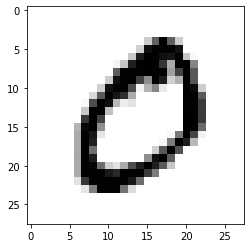

In [4]:
plt.imshow(x_train[1],cmap=plt.cm.binary) #x_train[1]:x_train행렬의 2번째 이미지
plt.show()

#실행값:이미지 0

In [5]:
print(y_train[1])

#실행값:숫자 0

0


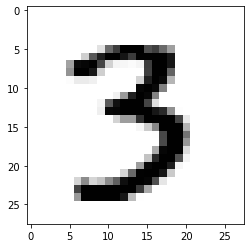

10001 번째 이미지의 숫자는 바로  3 입니다.


In [7]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=10000    # >> 인덱스 변경하면 숫자 바뀜
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

#실행값 : 10001 번째 이미지의 숫자는 바로 3 입니다.

### 학습용 데이터와 시험용 데이터

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

학습용데이터 : 입력(x_train), 정답(y_train)

시험용데이터 : 입력(x_test), 정답(y_test)

In [9]:
print(x_train.shape)
#학습용 데이터 확인 코드
#실행값 : (60000, 28, 28) > 28x28크기의 숫자 이미지가 60,000장 있다.

(60000, 28, 28)


In [10]:
print(x_test.shape)
#시험용 데이터 확인 코드
#실행값 : (10000, 28, 28) > 28x28크기의 숫자 이미지가 10,000장 있다.

(10000, 28, 28)


### 데이터 전처리

In [11]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

#실행값 : 최소값: 0  최대값: 255
#숫자 손글씨 이미지의 실제 픽셀 값은 0~255사이의 값을 가진다

최소값: 0  최대값: 255


In [12]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0 #데이터들을 255.0으로 나눠주기
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

#실행값 : 최소값: 0.0  최대값: 1.0

최소값: 0.0  최대값: 1.0


## 딥러닝 네트워크 설계

tf.keras의 Sequential API를 이용하여 LeNet이라는 딥러닝 네트워크를 설계한 예

In [13]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1))) #16=사용하는 이미지 특징의 수(얼마나 다양한 이미지의 특징을 살펴볼 것인지, 고려 할 것인지) #input_shape=입력 이미지의 형태
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu')) #32=32개의 이미지 특징을 고려
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu')) #32=분류기에 사용되는 뉴런의 숫자. 값이 클수록 복잡한 분류기
model.add(keras.layers.Dense(10, activation='softmax')) #10=결과적으로 분류해 내야 하는 클래스 수. 0~9까지 총 10개의 class를 구분하므로 10. 

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


딥러닝 네트워크 모델 확인

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

### 딥러닝 네트워크 학습

이전 코드 첫 번째 레이어에 input_shape=(28,28,1) 지정 후, print(x_train.shape)를 하면 (60000,28,28) 채널수에 대한 정보가 없음
->(60000,28,28,1)로 만들어야 함
*1의 의미=흑백 이미지 / 컬러이미지의 경우 3

In [15]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [16]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10) #epochs:전체 60,000개의 데이터를 10번 반복 사용해서 학습하라.

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1856 - accuracy: 0.9434
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0672 - accuracy: 0.9791
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0504 - accuracy: 0.9844
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0393 - accuracy: 0.9877
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0322 - accuracy: 0.9898
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0275 - accuracy: 0.9913
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0230 - accuracy: 0.9926
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0194 - accuracy: 0.9940
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0158 - accuracy: 0.9949
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.014

학습이 진행됨에 따라 epoch별로 인식정확도(accuracy)가 올라감
학습할 때마다 인식 정확도는 변동됨

### test data로 성능 확인

In [17]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 0s - loss: 0.0468 - accuracy: 0.9875 - 461ms/epoch - 1ms/step
test_loss: 0.046809472143650055 
test_accuracy: 0.987500011920929


model.evaluate() 대신 model.predict()를 사용하면 model이 입력값을 보고 실제로 추론한 확률분포를 출력할 수 있다

In [18]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [5.2453392e-11 8.4683427e-10 5.8795770e-08 3.0176082e-07 8.7340907e-10
 9.0353055e-12 3.0638708e-19 9.9999881e-01 1.5981308e-11 6.7437759e-07]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


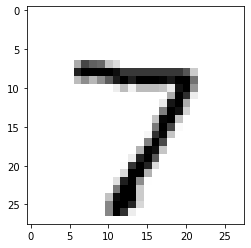

In [19]:
#숫자 7이 맞는지 이미지로 확인
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우

예측확률분포: [5.8483739e-08 2.1400093e-07 2.5909208e-09 5.4552871e-01 4.4111875e-10
 4.5299777e-01 1.1077357e-13 4.7153073e-09 2.6523298e-07 1.4729401e-03]
라벨: 5, 예측결과: 3


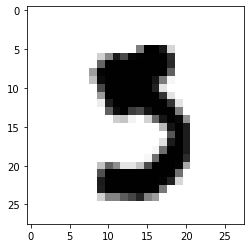

예측확률분포: [9.6328253e-01 2.4464793e-11 3.2579657e-02 2.0595608e-07 1.7860851e-09
 4.8045568e-08 2.7944433e-04 3.2231769e-13 3.8581875e-03 8.1686177e-12]
라벨: 8, 예측결과: 0


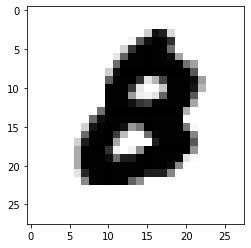

예측확률분포: [3.4391628e-11 7.2598000e-06 1.7622535e-04 2.5583540e-05 9.9803128e-06
 1.0100890e-08 1.2237517e-12 9.9976379e-01 1.6689621e-05 4.1328678e-07]
라벨: 8, 예측결과: 7


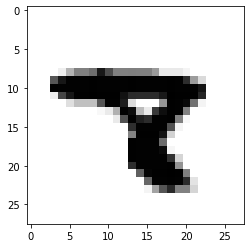

예측확률분포: [8.1937507e-02 1.3117528e-08 5.6601181e-07 1.8865279e-06 3.2995311e-09
 1.0007124e-01 7.6280731e-01 4.7726468e-07 5.5180904e-02 2.8678074e-10]
라벨: 8, 예측결과: 6


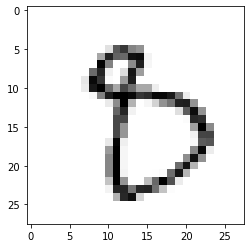

예측확률분포: [2.2335630e-02 5.0613926e-07 3.9668247e-04 1.6793839e-04 1.1357509e-09
 1.2630423e-06 3.6902959e-14 9.7044688e-01 5.1199674e-08 6.6509820e-03]
라벨: 0, 예측결과: 7


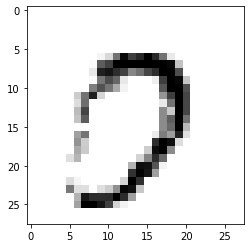

In [20]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

### 인식률 높은 네트워크 만들기

하이퍼파라미터들을 바꾸기

In [21]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 32)               

In [22]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=64
n_dense=50
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 50)               